In [1]:
% matplotlib inline
import numpy as np
import pickle
import numpy.random as npr
import matplotlib.pyplot as plt

from SwingyMonkey import *

## Loading and playing with randomized data from 100 epochs (plus that from optimized policies)

In [2]:
with open("qlearn_online_hist",'r') as f:
    hist_dict = pickle.load(f)

In [3]:
with open("batch_hist",'r') as f3:
    batch_hist_dict = pickle.load(f3)

In [4]:
with open("random_hist",'r') as rf:
    random_hist_dict = pickle.load(rf)

In [5]:
print batch_hist_dict['score_history']

[3, 0, 3, 1, 1, 1, 1, 5, 1, 1, 0, 13, 1, 3, 13, 4, 1, 11, 3, 5, 1, 4, 2, 1, 3, 2, 1, 1, 3, 1, 11, 3, 0, 1, 0, 1, 0, 1, 1, 10, 23, 2, 5, 1, 4, 1, 5, 1, 1, 5, 31, 1, 7, 1, 1, 1, 2, 1, 0, 2, 1, 0, 1, 4, 2, 1, 1, 1, 3, 8, 1, 6, 17, 1, 15, 2, 1, 2, 6, 2, 10, 1, 13, 1, 1, 9, 1, 5, 13, 16, 14, 0, 5, 2, 2, 2, 1, 2, 0, 1]


In [6]:
print hist_dict['score_history']

[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 1, 1, 4, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 8, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 4, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 3, 0, 1, 1, 5, 0, 2, 0, 3, 1, 0, 0, 3]


In [7]:
print random_hist_dict['score_history']

[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


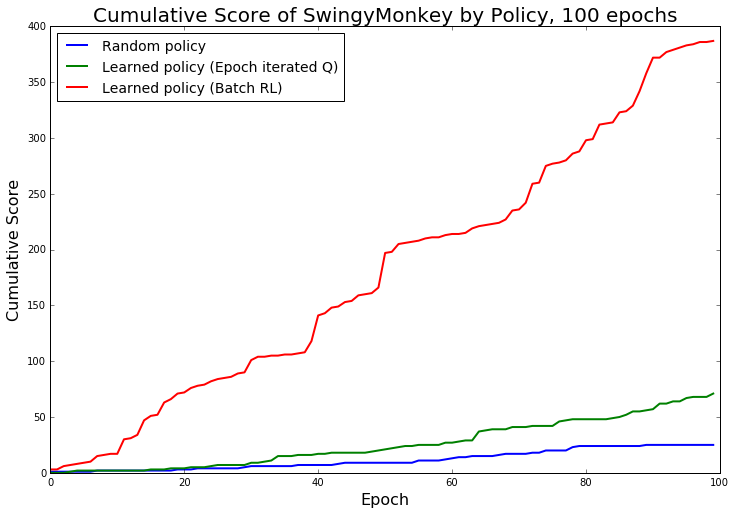

In [8]:
plt.figure(figsize=(12,8))
plt.plot(np.cumsum(random_hist_dict['score_history']),lw=2,label='Random policy')
plt.plot(np.cumsum(hist_dict['score_history']),lw=2,label='Learned policy (Epoch iterated Q)')
plt.plot(np.cumsum(batch_hist_dict['score_history']),lw=2,label='Learned policy (Batch RL)')
plt.xlabel('Epoch',fontsize=16)
plt.ylabel('Cumulative Score',fontsize=16)
plt.title("Cumulative Score of SwingyMonkey by Policy, 100 epochs",fontsize=20)
plt.legend(loc=0,fontsize=14)
plt.show()

In [9]:
print "Max score from batch RL: ",np.max(batch_hist_dict['score_history'])
print "Mean score from batch RL: ",np.mean(batch_hist_dict['score_history'])
print "Min score from batch RL: ",np.min(batch_hist_dict['score_history'])

Max score from batch RL:  31
Mean score from batch RL:  3.87
Min score from batch RL:  0


In [10]:
print "Max score from Online Q learning: ",np.max(hist_dict['score_history'])
print "Mean score from Online Q learning: ",np.mean(hist_dict['score_history'])
print "Min score from Online Q learning: ",np.min(hist_dict['score_history'])

Max score from batch RL:  8
Mean score from batch RL:  0.71
Min score from batch RL:  0


In [11]:
print "Max score from Random Policy: ",np.max(random_hist_dict['score_history'])
print "Mean score from Random Policy: ",np.mean(random_hist_dict['score_history'])
print "Min score from batch Random Policy: ",np.min(random_hist_dict['score_history'])

Max score from batch RL:  3
Mean score from batch RL:  0.25
Min score from batch RL:  0


### Now lets look how the policy improves batch by batch

In [12]:
with open("batch_learning_hist","r") as bh:
    batch_iter_hist = pickle.load(bh)

In [16]:
len(batch_iter_hist['score_history'])

600

Random had a mean score of 0.25, with max score of 3
Batch 1 had a mean score of 0.32, with max score of 2
Batch 2 had a mean score of 0.8, with max score of 4
Batch 3 had a mean score of 0.18, with max score of 3
Batch 4 had a mean score of 0.9, with max score of 7
Batch 5 had a mean score of 1.18, with max score of 6
Batch 6 had a mean score of 1.48, with max score of 12
Batch 7 had a mean score of 1.38, with max score of 8
Batch 8 had a mean score of 2.04, with max score of 7
Batch 9 had a mean score of 2.02, with max score of 10
Batch 10 had a mean score of 3.66, with max score of 17
Optimal Policy had a mean score of 3.87, with max score of 31


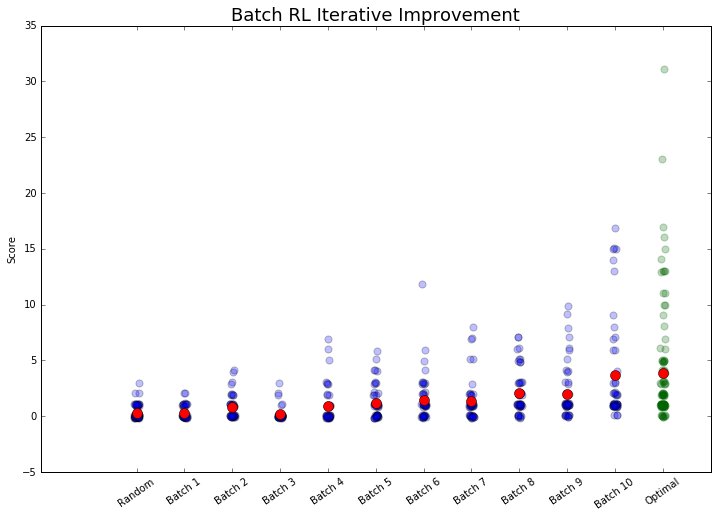

In [21]:
xlab = []
plt.figure(figsize=(12,8))
for ii in range(11):
    if ii == 0:
        temp = batch_iter_hist['score_history'][:100]
        test = "Random"
    else:
        temp = batch_iter_hist['score_history'][(100+(ii-1)*50):(100+(ii)*50)]
        test = "Batch {}".format(ii)
    plt.scatter(np.ones(len(temp))*ii+np.random.uniform(low=-0.05,high=0.05,size=len(temp)),temp+np.random.uniform(low=-0.15,high=0.15,size=len(temp)),alpha=0.25,s=50)
    plt.plot(ii,np.mean(temp),'ro',markersize=10)
    xlab.append(test)
    print test+" had a mean score of {0}, with max score of {1}".format(np.mean(temp),np.max(temp))
plt.scatter(np.ones(len(batch_hist_dict['score_history']))*11+np.random.uniform(low=-0.05,high=0.05,size=len(batch_hist_dict['score_history'])),batch_hist_dict['score_history']+np.random.uniform(low=-0.15,high=0.15,size=len(batch_hist_dict['score_history'])),alpha=0.25,color='darkgreen',s=50)
plt.plot(11,np.mean(batch_hist_dict['score_history']),'ro',markersize=10)
print "Optimal Policy had a mean score of {0}, with max score of {1}".format(np.mean(batch_hist_dict['score_history']),np.max(batch_hist_dict['score_history']))
xlab.append("Optimal")
plt.ylabel('Score')
plt.xticks(range(12),xlab,rotation=35)
plt.title("Batch RL Iterative Improvement",fontsize=18)
plt.show()